# Unsupervised Classification

---
This task covers the following modules:
> 1.  Dimensionality Reduction
> 2.  Unsupervised Classification - $k$-means clustering and spectral clustering
---

Dataset for this task:

1.  [Red Wine](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

This dataset is sourced from the [wine quality dataset from UCI ML data repository](https://archive.ics.uci.edu/ml/datasets/wine+quality).


`Important Note:` For reproducibility, use `Random State = 1` wherever required.



Import the necessary libraries.

In [1]:
#### TODO: Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn import decomposition
from sklearn.decomposition import KernelPCA, PCA

## 1. Data Importing, Preprocessing and Feature Selection






### 1.1 Data Importing

Import the `winequality-red.csv` file from the [wine quality dataset from UCI ML data repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). Display it as a `DataFrame`.

> Please note that this assignment focusses on `UNsupervised classification`, where you do not have the labels of the data. Thus, forget about using the labels (`quality` variable) in the dataset.
> 
> While I can't stop you from using it, it is going to hinder your learning if you use it before you are requested to do so. 

In [3]:
#### TODO: Write your code here
df_wine = pd.read_csv('winequality-red_fixed.csv')
df_data = df_wine.drop('quality', axis=1) #creating a dataframe without 'quality' variable for unsupervised learning
y_data = df_wine['quality']
# Displaying first 10 rows of the dataframe 
df_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


### 1.2 Preprocessing

1. Normalize the data.

2. How important is normalization in case of unsupervised learning?

In [4]:
#### Write your code here

# Using MinMaxScaler to normalize the given data
mms = MinMaxScaler()
mod = mms.fit(df_data)
df_norm = mod.transform(df_data)

# Using StandardScaler for normalizing data
ss = StandardScaler()
df_norm_ss = ss.fit_transform(df_data)

# creating a new dataframe with normalized data
df_norm = pd.DataFrame(data=df_norm)
df_norm.columns = df_data.columns

# creating a new dataframe with normalized data
df_norm_ss = pd.DataFrame(data=df_norm_ss)
df_norm_ss.columns = df_data.columns

# Displaying first 10 rows of normalized data
df_norm.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
5,0.247788,0.369863,0.00,0.061644,0.105175,0.169014,0.120141,0.567548,0.606299,0.137725,0.153846
6,0.292035,0.328767,0.06,0.047945,0.095159,0.197183,0.187279,0.464758,0.440945,0.077844,0.153846
7,0.238938,0.363014,0.00,0.020548,0.088481,0.197183,0.053004,0.332599,0.511811,0.083832,0.246154
8,0.283186,0.315068,0.02,0.075342,0.101836,0.112676,0.042403,0.494126,0.488189,0.143713,0.169231
9,0.256637,0.260274,0.36,0.356164,0.098497,0.225352,0.339223,0.567548,0.480315,0.281437,0.323077


In [5]:
# Displaying first 10 rows of normalized data using standard scaler
df_norm_ss.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
5,-0.528360,0.738418,-1.391472,-0.524166,-0.264960,-0.274931,-0.196679,0.558274,1.288643,-0.579207,-0.960246
6,-0.241094,0.403229,-1.083370,-0.666062,-0.392483,-0.083669,0.381091,-0.183745,-0.072005,-1.169337,-0.960246
7,-0.585813,0.682553,-1.391472,-0.949853,-0.477498,-0.083669,-0.774449,-1.137769,0.511130,-1.110324,-0.397043
8,-0.298547,0.291499,-1.288771,-0.382271,-0.307468,-0.657454,-0.865676,0.028261,0.316751,-0.520193,-0.866379
9,-0.470907,-0.155419,0.457144,2.526589,-0.349975,0.107592,1.688677,0.558274,0.251958,0.837107,0.072294


### 1.3 Feature Selection

Pick a pair of variables about which the data is the most spread out (i.e. have the highest variance).



In [6]:
#### TODO: Write your code here
# Calculating variances of features in dataset
var_data = df_norm.var()
var_data = (var_data/np.sum(var_data))*100
var_data = var_data.sort_values(ascending=False)
var_data = np.around(var_data, 2)

In [7]:

# from scipy.stats import gaussian_kde

# plt.figure(figsize=(30,30))
# for i in range(len(df_norm.columns)):
    
#     data = df_norm.iloc[:,i]
#     kde = gaussian_kde(data)
#     xs = np.linspace(np.min(data), np.max(data), 100)

#     pos = i+1
#     plt.subplot(4,3,pos)
#     plt.hist(data, bins=25, edgecolor = 'k', density=True)
#     plt.plot(xs, kde(xs), lw = 2)
#     plt.title(f"{df_norm.columns[i]}") # : Skewness={skw[i]:.3f}, Kurtosis={kts[i]:.3f}")
# plt.show()

# #### TODO: Write your code here
# plt.figure(figsize=(30, 30))

# a = k = pos = 0
# temp = 1
# #IQR =[]
# for i in range(len(df_data.columns)):
#     pos = i+1
#     vals = df_norm.iloc[:, i]

#     # Calculating iqr to find variables with most spread out data
#     q75, q25 = np.percentile(vals, [75,25])
#     iqr = q75 - q25
#     print(f'IQR for {df_norm.columns[i]} is {iqr}')

#     # plotting boxplot
#     plt.subplot(4, 3, pos)
#     plt.boxplot(vals)
#     plt.title(df_norm.columns[i])
    
# plt.show()

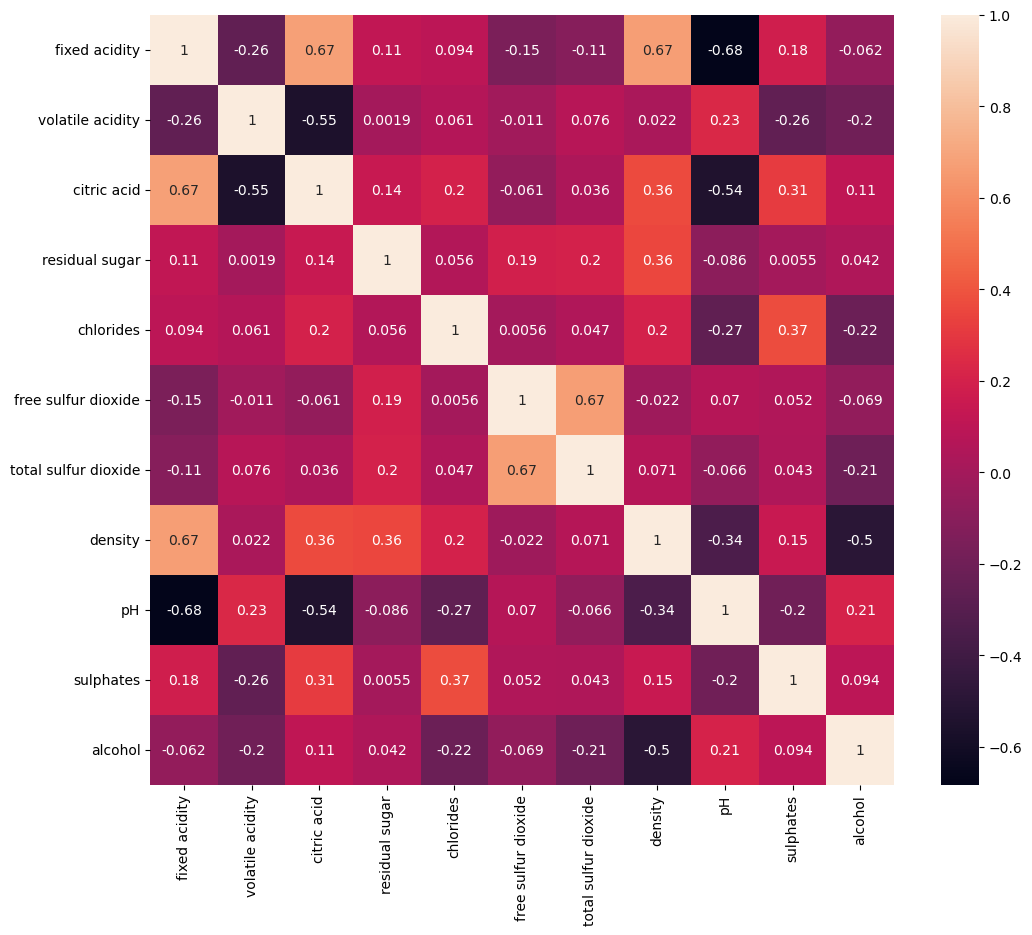

In [7]:
# Plotting pairplots of the normalized dataset

plt.figure(figsize=(12,10))
sns.heatmap(data=df_norm.corr(method='pearson'), annot=True)
plt.show()

> 1. List atleast two different criteria (like metrics or plots) to pick the pair of variables.  
>> Variance values of each feature in dataset along with a Heatmap showing correlations could be used for selecting pair of variables with most spread out data. Plots like boxplots & histograms could also be used to give measure of variance of each feature in dataset.
 
>> Pairplots would provide both in-feature variance as well as pairwise correlating plots, thus, they could also be used for picking pair of variables here.

> 2. Which criteria did you choose. Justify your choice.
>> Variance calculation along with Heatmap was the used criteria. 
>> Variance calculation informs about the features with most spread out data. Since having a correlation can impact the total variance in a feature, before picking the pair of variables, it's important to ensure that they have minimum correlation between them
> Based on the used criteria the pair of variables with most spread out data is `fixed acidity` and `alcohol`

> 3. Was a single criteria sufficient to choose those two variables? Why?
>> Pairplot could be enough to choose these two variables as it would provide both in-feature variance as well as pair-wise correlations of the features
> 4. Show a scatter plot of the chosen variables. 

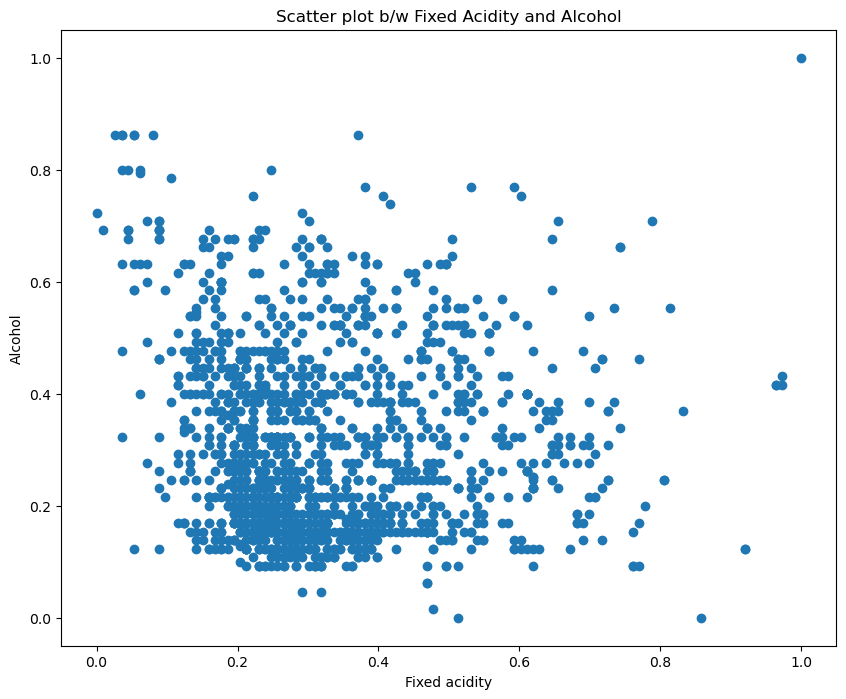

In [8]:
#### TODO: Write your code here

# Showing the scatter plot b/w the chosen variables
plt.figure(figsize=(10,8))
plt.scatter(df_norm['fixed acidity'], df_norm['alcohol'])
plt.xlabel('Fixed acidity')
plt.ylabel('Alcohol')
plt.title('Scatter plot b/w Fixed Acidity and Alcohol')

plt.show()

### 1.4 Test-Train Split

 Split the dataset into training ($70\%$) and test ($30\%$) datasets. Use `random_state=1` for reproducibility.

In [9]:
#### TODO: Write your code here
X = df_data.values
y = df_wine.iloc[:,-1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 1)

# Standardizing the datasets
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)  # Fitting training data
X_train = mmscaler.transform(X_train)  # Normalizing/Standardizing training data

X_test = mmscaler.transform(X_test)    # Normalizing/Standardizing test data
df_xtrain_norm = pd.DataFrame(data=X_train, columns=df_data.columns)

# Displaying 10 rows of the training dataset
df_xtrain_norm.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.318584,0.828767,0.00,0.061538,0.115385,0.028169,0.022059,0.483945,0.622047,0.095808,0.384615
1,0.238938,0.253425,0.10,0.130769,0.093645,0.042254,0.029412,0.424312,0.440945,0.083832,0.323077
2,0.362832,0.493151,0.00,0.038462,0.088629,0.323944,0.099265,0.407492,0.417323,0.131737,0.200000
3,0.345133,0.318493,0.18,0.092308,0.110368,0.056338,0.088235,0.506881,0.362205,0.089820,0.215385
4,0.407080,0.301370,0.18,0.053846,0.110368,0.126761,0.055147,0.435015,0.322835,0.095808,0.230769
5,0.327434,0.130137,0.39,0.115385,0.110368,0.225352,0.136029,0.334098,0.448819,0.263473,0.630769
6,0.300885,0.321918,0.05,0.084615,0.128763,0.154930,0.095588,0.556575,0.488189,0.167665,0.246154
7,0.274336,0.489726,0.00,0.130769,0.115385,0.070423,0.029412,0.568043,0.440945,0.113772,0.138462
8,0.238938,0.246575,0.32,0.092308,0.083612,0.422535,0.176471,0.551223,0.440945,0.191617,0.246154
9,0.442478,0.301370,0.31,0.146154,0.128763,0.197183,0.147059,0.598624,0.291339,0.353293,0.246154


## 2. Principal Components Analysis




### 2.1 Variance Captured 

1. Find the principal components of the training dataset using the `PCA` and `KernelPCA` (with `linear` kernel) methods in the `sklearn` library.

2. Create the following `plot`s in a single subplot
> 1. The percentage variance captured by each feature in the dataset in descending order
> 2. The percentage variance captured by each principal component identified using PCA
> 3. The percentage variance captured by each principal component identified using KernelPCA
>> Annotate each point in the plot with the corresponding percentage of variance it captured.



3. What can you infer from the figure?

In [10]:
#### TODO: Write your code here

# Calculating % variance captured by each feature in training dataset
var_xtrain = df_xtrain_norm.var()
var_xtrain = (var_xtrain/np.sum(var_xtrain))*100
var_xtrain_sorted = var_xtrain.sort_values(ascending=False)
var_xtrain_sorted = np.around(var_xtrain_sorted, 2)

In [11]:

# Calculating % variance captured by each principal component (PC) identified using PCA
pca = PCA()
pca.fit(X_train)
pc_ev = pca.explained_variance_ratio_ # variance captured by each principal component
#pc_ev = pc_ev/sum(pc_ev)
i = 1
for val in pc_ev:
    print(f'% variance explained by PC-{i} is {(val*100):.2f}%')
    i += 1
pc_ev = pc_ev*100
pc_ev = np.around(pc_ev, 2)

% variance explained by PC-1 is 36.61%
% variance explained by PC-2 is 19.32%
% variance explained by PC-3 is 14.55%
% variance explained by PC-4 is 7.25%
% variance explained by PC-5 is 5.31%
% variance explained by PC-6 is 5.00%
% variance explained by PC-7 is 4.19%
% variance explained by PC-8 is 3.40%
% variance explained by PC-9 is 2.34%
% variance explained by PC-10 is 1.45%
% variance explained by PC-11 is 0.59%


In [12]:
#### TODO: Write your code here

# Calculating % variance captured by each principal component (PC) identified using KPCA
kpca = KernelPCA(kernel= 'linear')
#kpca_transform = kpca.fit_transform(X_train)
kpca.fit(X_train)
kpca_transform = kpca.transform(X_train)
#kpca_ev = kpca.eigenvalues_
kpca_ev = np.var(kpca_transform, axis=0)
var_vals = kpca_ev / sum(kpca_ev)

i = 1
for value in var_vals:
    print(f'% variance explained by PC-{i} in case of Kernel PCA is {(value*100):.2f}%')
    i += 1
var_vals = var_vals*100
var_vals = np.around(var_vals, 2)

% variance explained by PC-1 in case of Kernel PCA is 36.61%
% variance explained by PC-2 in case of Kernel PCA is 19.32%
% variance explained by PC-3 in case of Kernel PCA is 14.55%
% variance explained by PC-4 in case of Kernel PCA is 7.25%
% variance explained by PC-5 in case of Kernel PCA is 5.31%
% variance explained by PC-6 in case of Kernel PCA is 5.00%
% variance explained by PC-7 in case of Kernel PCA is 4.19%
% variance explained by PC-8 in case of Kernel PCA is 3.40%
% variance explained by PC-9 in case of Kernel PCA is 2.34%
% variance explained by PC-10 in case of Kernel PCA is 1.45%
% variance explained by PC-11 in case of Kernel PCA is 0.59%


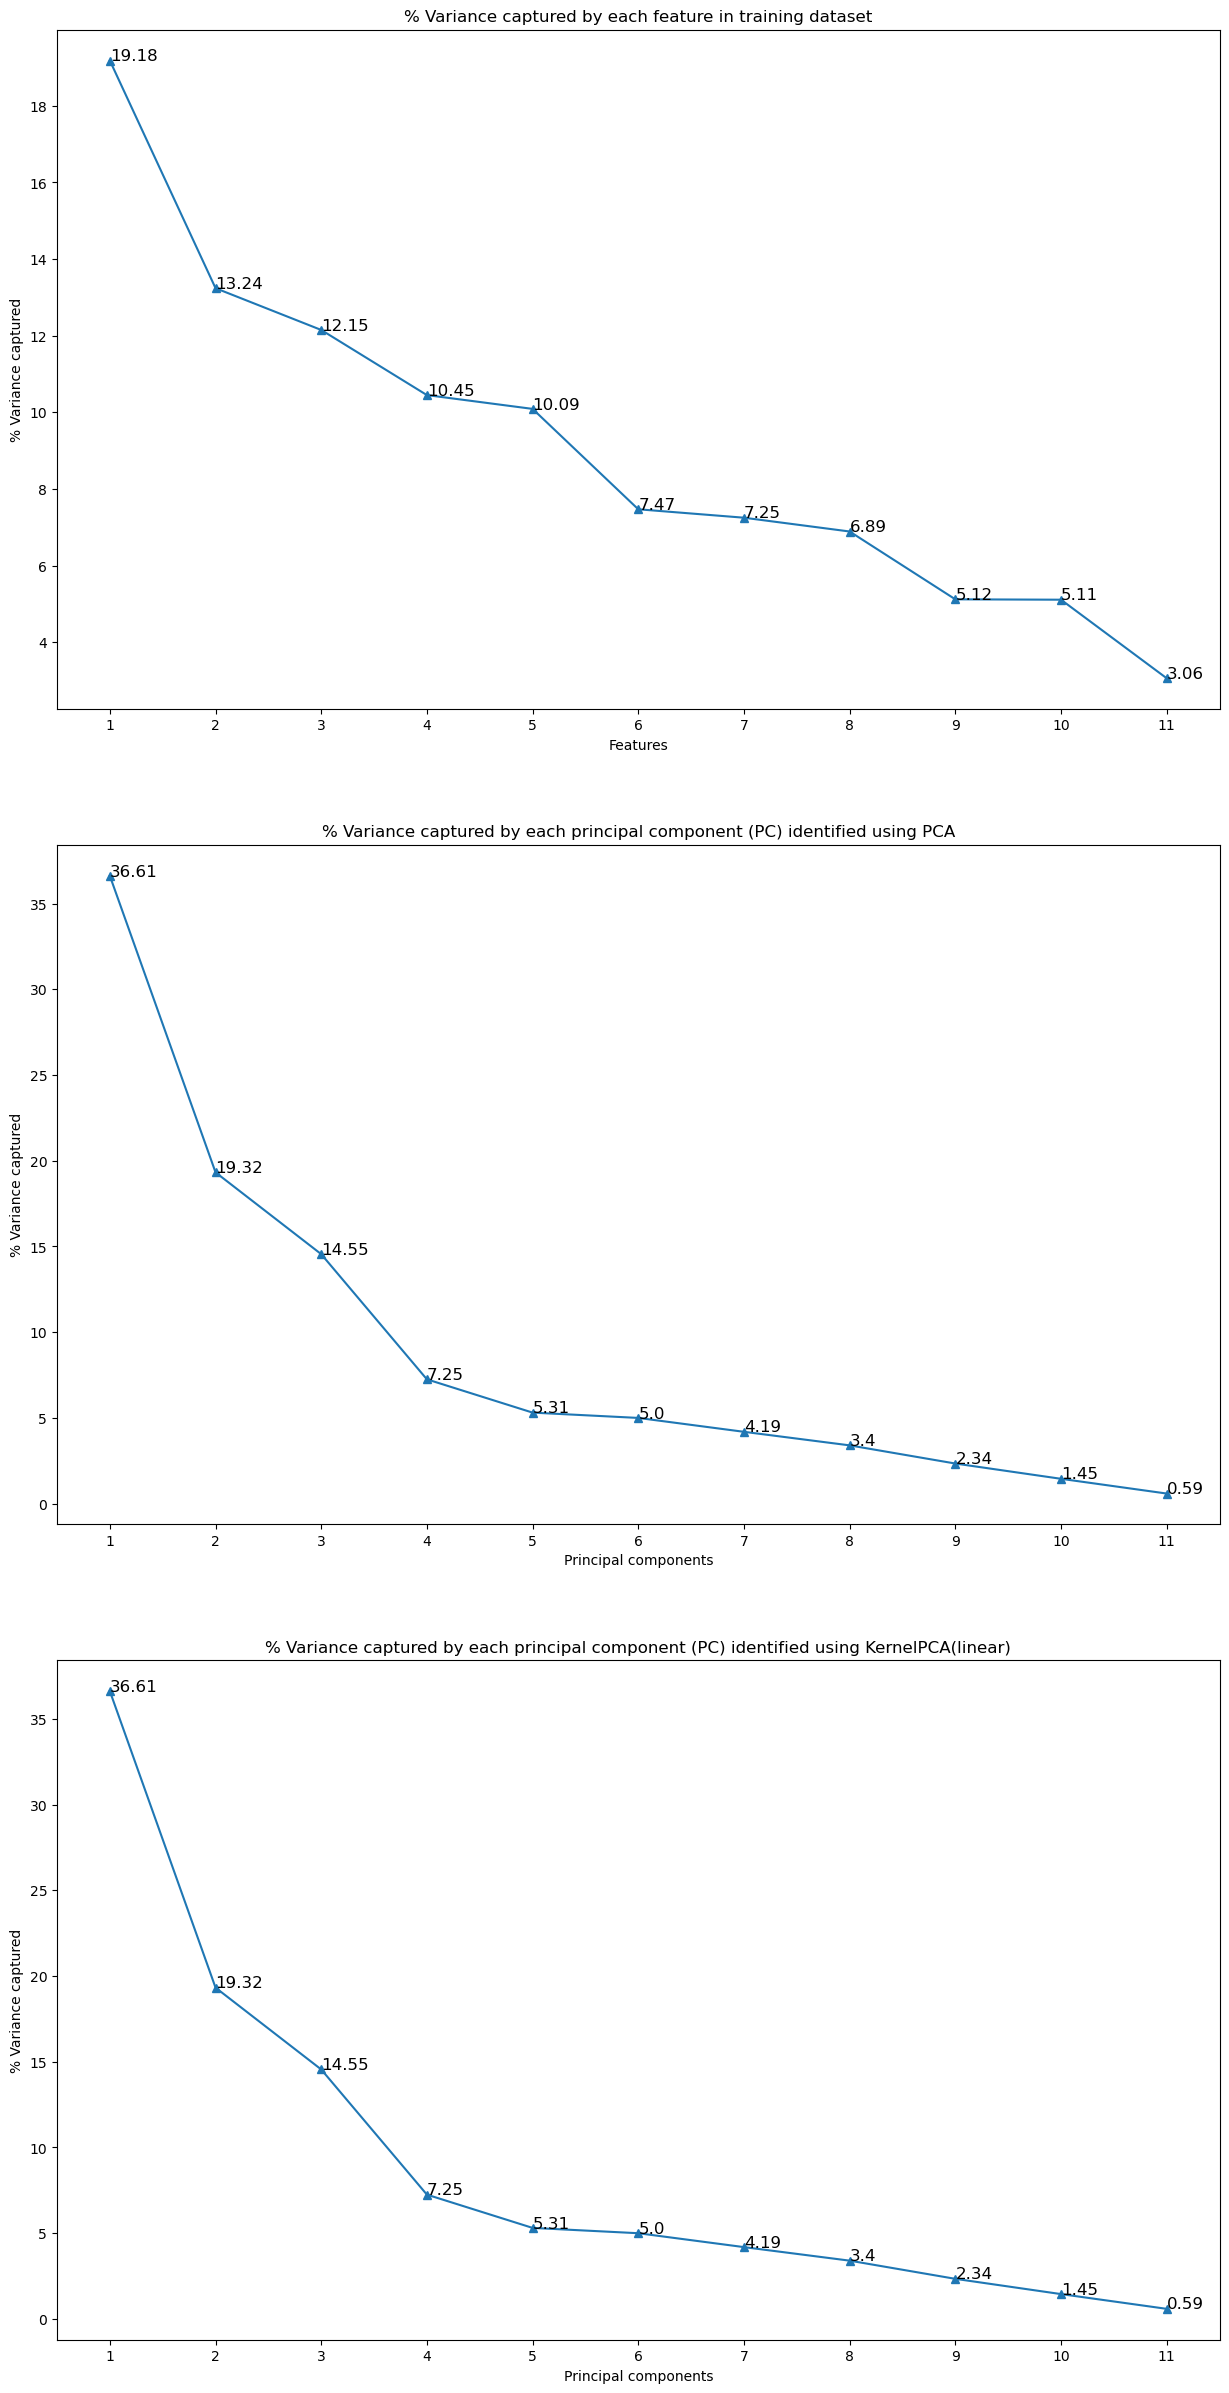

In [13]:
#### TODO: Write your code here
indices = list(range(1, len(var_xtrain_sorted)+1))
# Plotting captured variances in all three cases
fig, ax = plt.subplots(3,figsize = (15,30))

ax[0].plot(indices, var_xtrain_sorted, marker='^')
ax[0].set(xlabel= 'Features', ylabel='% Variance captured')
ax[0].set_title('% Variance captured by each feature in training dataset')
ax[0].set(xticks=indices)
for i in range(len(indices)):
   ax[0].annotate(var_xtrain_sorted[i], (indices[i], var_xtrain_sorted[i]), size=12)

ax[1].plot(indices, pc_ev, marker='^')
ax[1].set(xlabel= 'Principal components', ylabel='% Variance captured')
ax[1].set_title('% Variance captured by each principal component (PC) identified using PCA')
ax[1].set(xticks=indices)
for i in range(len(indices)):
   ax[1].annotate(pc_ev[i], (indices[i], pc_ev[i]), size=12)


ax[2].plot(indices, var_vals,marker='^')
ax[2].set(xlabel= 'Principal components', ylabel='% Variance captured')
ax[2].set_title('% Variance captured by each principal component (PC) identified using KernelPCA(linear)')
ax[2].set(xticks=indices)
for i in range(len(indices)):
   ax[2].annotate(var_vals[i], (indices[i], var_vals[i]), size=12)

plt.show()

Use of top two principal components tends to capture % variance much better as compared to the use of all features.
Also, KernelPCA with linear kernel seems to produce same results as PCA 

### 2.2 Data Visualization

1. Extract the top two principal components of the dataset using PCA and KernelPCA.
2. Transform the normalized red wine training dataset using the top two principal components.
3. Create a figure having three subplots which contains the following 
> 1. scatter plot between the two chosen features of the dataset which captures the most variance.
> 2. scatter plot of the top two principal components of `PCA`
> 3. scatter plot of the top two principal components of `KernelPCA` 
>
> Include the total variance captured by the selected variables in the title of the subplots.
4. What can you infer from the figure?
5. Which method captured the most variance on the dataset: two features with the highest variance or the top two principal components of `PCA` or that of `KernelPCA`?


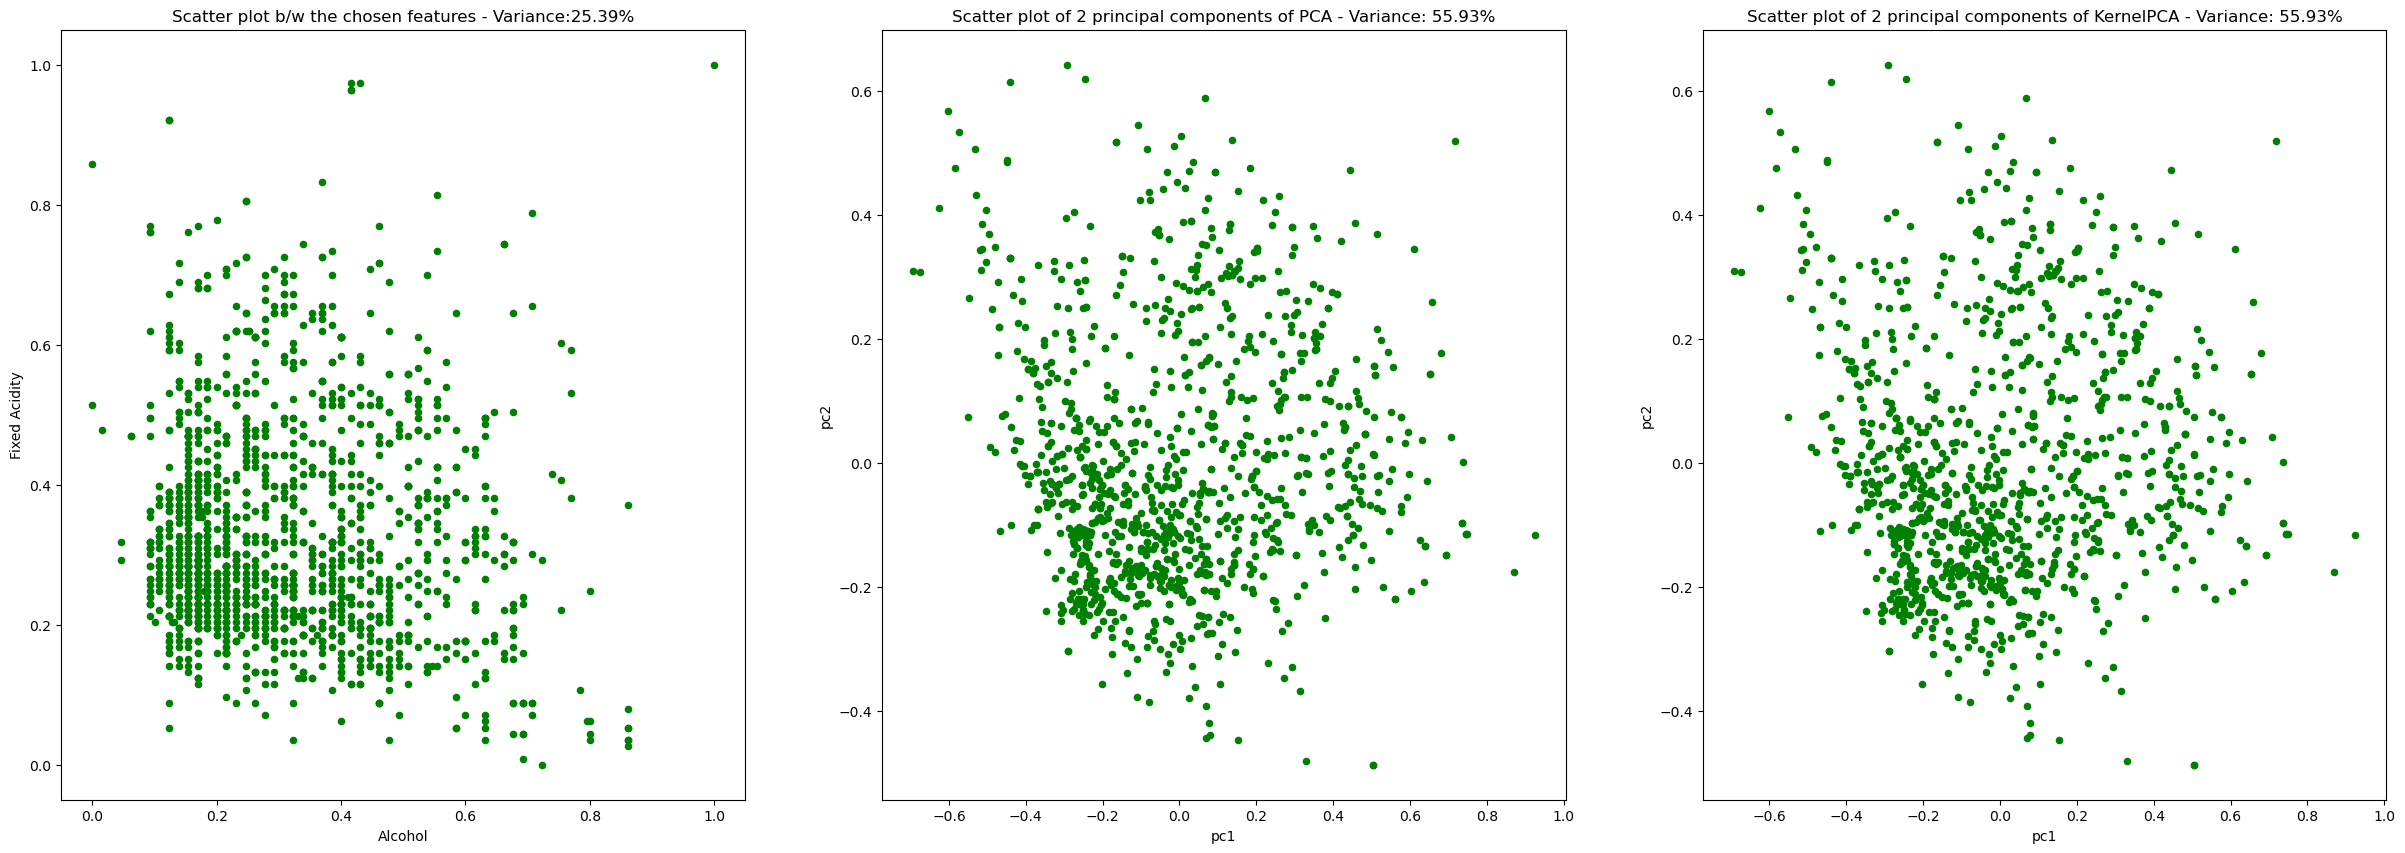

In [14]:
#### TODO: Write your code here
pca2 = PCA(n_components = 2, random_state=1)
pca_principalcomps = pca2.fit_transform(X_train)
pca_pc1 = pca_principalcomps[:, 0]
pca_pc2 = pca_principalcomps[:, 1]

kpca2 = KernelPCA(n_components=2, kernel='linear', random_state=1)
kpca_principalcomps = kpca2.fit_transform(X_train)
kpca_pc1 = kpca_principalcomps[:, 0]
kpca_pc2 = kpca_principalcomps[:, 1]

# Plotting Scatter plots
plt.figure(figsize=(30,10))

#Scatter Plot b/w the chosen features
plt.subplot(1,3,1)
plt.scatter(df_norm['alcohol'], df_norm['fixed acidity'], s=20, c='green')
plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.title(f"Scatter plot b/w the chosen features - Variance:{var_xtrain_sorted['alcohol'] + var_xtrain_sorted['fixed acidity']}%")

plt.subplot(1,3,2)
plt.scatter(pca_pc1, pca_pc2, s=20, c='green')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(f"Scatter plot of 2 principal components of PCA - Variance: {pc_ev[0]+pc_ev[1]}%")

plt.subplot(1,3,3)
plt.scatter(kpca_pc1, kpca_pc2, s=20, c='green')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(f"Scatter plot of 2 principal components of KernelPCA - Variance: {var_vals[0]+var_vals[1]}%")

plt.show()

Ans-4: The plots of principal components of PCA and KernelPCA are same. It can be seen that, Kernel PCA with linear kernel acts similar to PCA

Ans-5: Highest variance (55.93%) is captured by the principal components of PCA and that of KernelPCA

## 3. Clustering

### 3.1 $k$-Means clustering on full dataset

1. Use $k$-means clustering to find the optimal number of clusters.
2. What is the optimum number of clusters for this dataset? Hint: You can use the cross-validation technique to estimate the optimum number of clusters.
3. Which metric did you use for cross-validation? [Check out this link](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score). What is its meaning? Were you able to choose $k$ (the number of clusters) with this metric? Why?
4. Use the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation) ($\S$2.3.10.5) as an additional metric for cross-validation. It is a metric for unsupervised classification. How different is it from the previous one? `Hint:`[KMeans.inertia_](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
5. Show the following as two subplots in a single figure:
> a. Variation of accuracy as the number of centroids (or clusters) increase (Generated as part of task 3)
>
> b. Variation of the Silhouette coefficient as the number of centroids increase (generated as part of task 4)
6. Were you able to choose the number of clusters? If yes, what is the optimum number of clusters? 
7. Which metrics is more helpful at choosing the number of clusters? Why?

Note:  All the metrics are not suitable for all kinds of data/applications.

In [15]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score

km_score_train = []
km_score_test = []

sil_score_train = []
sil_score_test = []

train_len = len(X_train)
test_len = len(X_test)

db_score_train = []
db_score_test= []

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X_train)
    km_score_train.append(kmeans.score(X_train))
    km_score_test.append(kmeans.score(X_test))

    sil_score_train.append(silhouette_score(X_train, kmeans.predict(X_train)))
    sil_score_test.append(silhouette_score(X_test, kmeans.predict(X_test)))

    db_score_train.append(davies_bouldin_score(X_train, kmeans.predict(X_train)))
    db_score_test.append(davies_bouldin_score(X_test, kmeans.predict(X_test)))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

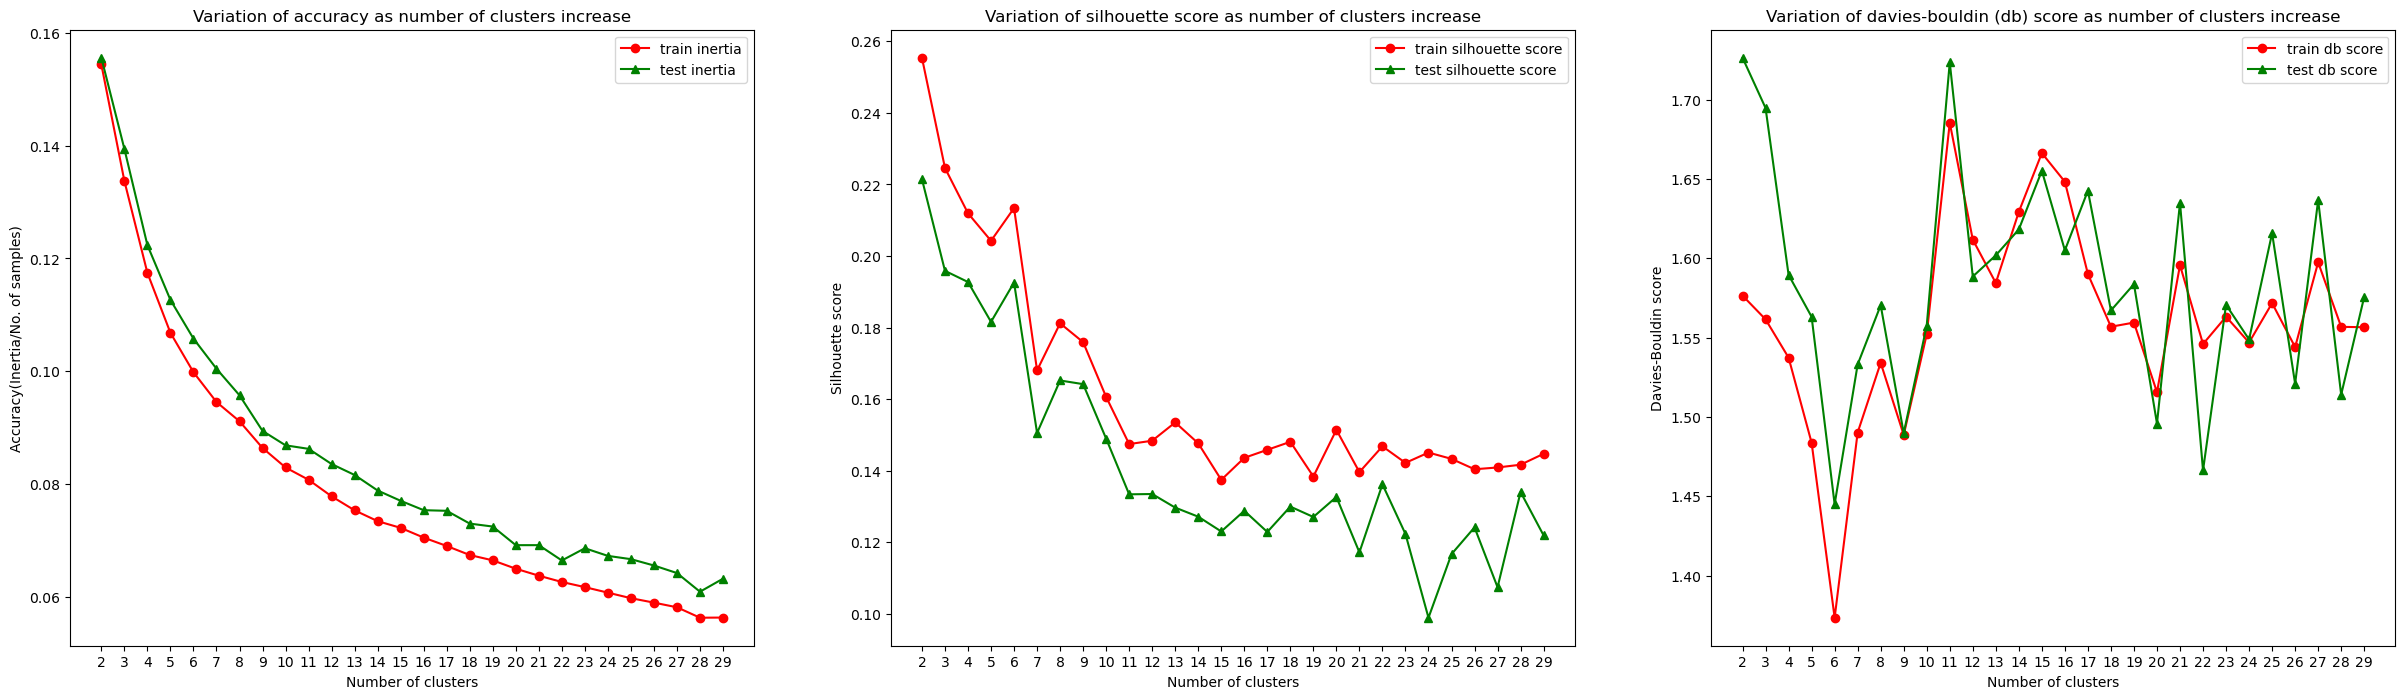

In [16]:
#### TODO: Write your code here

# Plotting score plots using different evaluation metrics
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.plot(range(2,30), np.abs(km_score_train)/train_len, marker = 'o', c='red', label='train inertia')
plt.plot(range(2,30), np.abs(km_score_test)/test_len, marker = '^', c='green', label='test inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy(Inertia/No. of samples)')
plt.title('Variation of accuracy as number of clusters increase')
plt.legend()
plt.xticks(range(2,30))

plt.subplot(1,3,2)
plt.plot(range(2,30), sil_score_train, marker = 'o', c='red', label='train silhouette score')
plt.plot(range(2,30), sil_score_test, marker = '^', c='green', label='test silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Variation of silhouette score as number of clusters increase')
plt.xticks(range(2,30))
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(2,30), db_score_train, marker = 'o', c='red', label='train db score')
plt.plot(range(2,30), db_score_test, marker = '^', c='green', label='test db score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Variation of davies-bouldin (db) score as number of clusters increase')
plt.xticks(range(2,30))
plt.legend()

plt.show()

Ans-3: Inertia value was used for estimating the optimal number of clusters. Inertia is the weighted sum of squared distances (WSS) of each point to its cluster center. Based on elbow method, when the drop in inertia starts becoming constant, that value of k can be used as the optimal k value. But in the given case, this metric does not yield a concrete answer as the elbow of the curve is smooth (the best estimate we can make here is that a value between 5-10 should be optimal k value).

Ans-4: Silhouette score gives measure of how similar a datapoint is within cluster compared to other clusters. Unlike inertia, having a higher silhouette score indicates having better quality of clusters. Thus looking at both metrics plots, it could be inferred that optimal k value should be `6` but to ensure this another metric that is used is davies-bouldin score. The davies-bouldin score signifies the similarity between clusters. Thus, having lower db score would mean better quality of clusters. PLotting this metric supports the inference that optimal k value should be 6.

Ans-6: `Optimum number of clusters is 6`

Ans-7: In the given case, `davies-bouldin score` tends to give a better estimate. Using combination of `inertia + silhouette score` also tends to give a good estimate of the optimal k value. 

### 3.2 $k$-Means Clustering on principal components

1. Use $k$-means clustering to find the optimal number of clusters using the top two principal components of `KernelPCA`.
2. Estimate the optimum number of clusters using Silhouette Coefficient. You can use the cross validation technique.
3. Show the variation of the Silhouette coefficient as the number of centroids increase in a figure.
4. what is the optimum number of clusters? 

In [17]:
#### TODO: Write your code here

kpca2 = KernelPCA(n_components=2, kernel='linear', random_state=1)
X_train_kpca2 = kpca2.fit_transform(X_train)
X_test_kpca2 = kpca2.fit_transform(X_test)

km_score_train = []
km_score_test = []

sil_score_train = []
sil_score_test = []

train_len = len(X_train_kpca2)
test_len = len(X_test_kpca2)

db_score_train = []
db_score_test= []

for i in range(2, 30):
    kmeans = KMeans(n_clusters=i, random_state=1).fit(X_train_kpca2)
    km_score_train.append(kmeans.score(X_train_kpca2))
    km_score_test.append(kmeans.score(X_test_kpca2))

    sil_score_train.append(silhouette_score(X_train_kpca2, kmeans.predict(X_train_kpca2)))
    sil_score_test.append(silhouette_score(X_test_kpca2, kmeans.predict(X_test_kpca2)))

    db_score_train.append(davies_bouldin_score(X_train_kpca2, kmeans.predict(X_train_kpca2)))
    db_score_test.append(davies_bouldin_score(X_test_kpca2, kmeans.predict(X_test_kpca2)))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

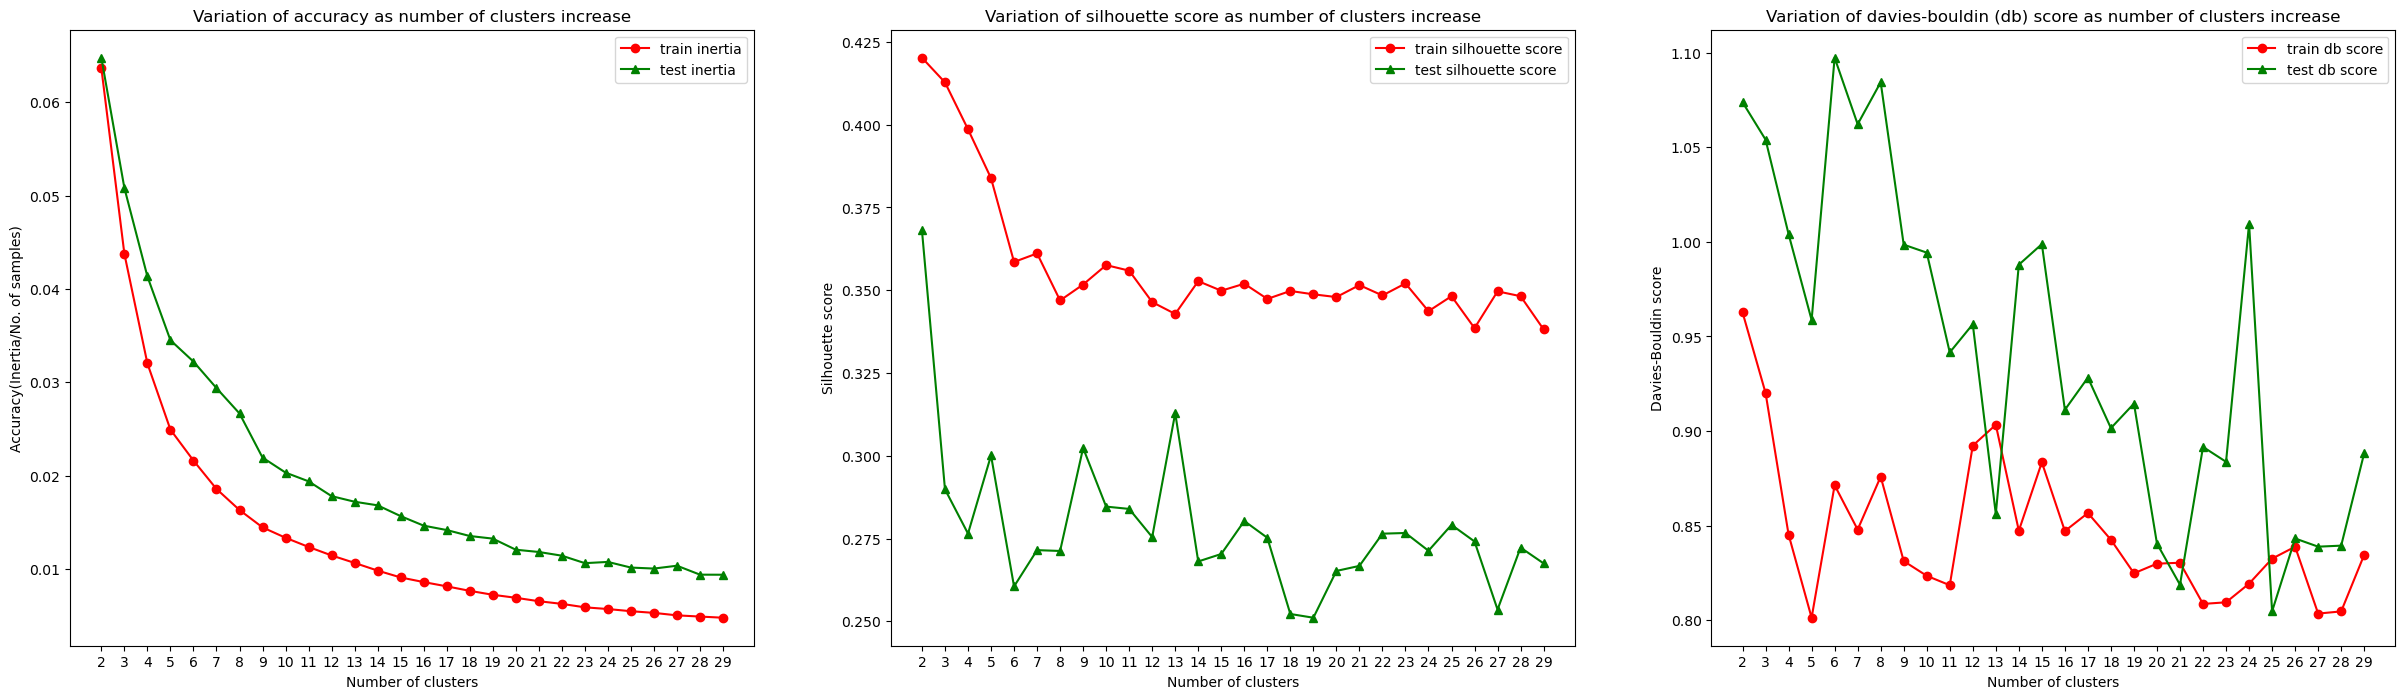

In [18]:
#### TODO: Write your code here
# Plotting score plots using different evaluation metrics
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.plot(range(2,30), np.abs(km_score_train)/train_len, marker = 'o', c='red', label='train inertia')
plt.plot(range(2,30), np.abs(km_score_test)/test_len, marker = '^', c='green', label='test inertia')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy(Inertia/No. of samples)')
plt.title('Variation of accuracy as number of clusters increase')
plt.legend()
plt.xticks(range(2,30))

plt.subplot(1,3,2)
plt.plot(range(2,30), sil_score_train, marker = 'o', c='red', label='train silhouette score')
plt.plot(range(2,30), sil_score_test, marker = '^', c='green', label='test silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Variation of silhouette score as number of clusters increase')
plt.xticks(range(2,30))
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(2,30), db_score_train, marker = 'o', c='red', label='train db score')
plt.plot(range(2,30), db_score_test, marker = '^', c='green', label='test db score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Variation of davies-bouldin (db) score as number of clusters increase')
plt.xticks(range(2,30))
plt.legend()

plt.show()

Ans-4: For k-means clustering on the principal components, `the optimal k value would be 5` based on the inertia, silhouette score and davies-bouldin score

## 4. Spectral Clustering on principal components

1. **Function Creation:** The `SpectralClustering.fit_predict()` method can predict the `labels` of a dataset. However, it has no method to predict the score. Thus, create a function that returns a `score` by accepting a `sample dataset` and its `labels`. The `labels` attribute each instance of the data to one of the clusters. The `score` represents the average distance between the data and its corresponding nearest centroid (of the cluster to which the data belongs to). The function should do the following things:
> a. The function should accept the `data` and corresponding `labels`. Each unique `label` corresponds to a unique cluster.
>
> b. Estimate the centroids of each cluster.
>
> c. Estimate the distance between each point in the dataset and the centroid of the cluster to which the point belongs to.
>
> d. Compute the average distance between each point and its nearest centroid. The function should return this value.

2. Use spectral clustering to find the optimal number of clusters of the training dataset using the top two principal components of `KernelPCA`. Use `affinity='nearest_neighbors'`.

3. Use the cross validation technique on the Silhouette coefficient to determine the optimal number of clusters. 

In [19]:
#### TODO: Write your code here
def pred_spectral_score(data, labels):
    l = np.unique(labels)
    
    cluster = []
    cluster_center = np.zeros(shape=(len(data), data.shape[1]))
    j=0

    for i in l:
        j = np.where(labels==i)[0]
        cluster.append(data[j])
        center = np.mean(data[j], axis=0)
        cluster_center[j] = center
    
    d = np.sum((data-cluster_center)**2, axis=1)
    score = np.mean(d)
    return score


In [21]:
#### TODO: Write your code here
kpca2 = KernelPCA(n_components=2, kernel='linear', random_state=1)
X_train_kpca2 = kpca2.fit_transform(X_train)
X_test_kpca2 = kpca2.fit_transform(X_test)

sc_score_train = []
sc_score_test = []

sil_score_train = []
sil_score_test = []

train_len = len(X_train_kpca2)
test_len = len(X_test_kpca2)

db_score_train = []
db_score_test= []

for i in range(2, 30):
    spec_cul = SpectralClustering(n_clusters=i, affinity= 'nearest_neighbors', random_state=1).fit(X_train_kpca2)
    sc_score_train.append(pred_spectral_score(X_train_kpca2, spec_cul.fit_predict(X_train_kpca2)))
    sc_score_test.append(pred_spectral_score(X_test_kpca2, spec_cul.fit_predict(X_test_kpca2)))

    sil_score_train.append(silhouette_score(X_train_kpca2, spec_cul.fit_predict(X_train_kpca2)))
    sil_score_test.append(silhouette_score(X_test_kpca2, spec_cul.fit_predict(X_test_kpca2)))

    db_score_train.append(davies_bouldin_score(X_train_kpca2, spec_cul.fit_predict(X_train_kpca2)))
    db_score_test.append(davies_bouldin_score(X_test_kpca2, spec_cul.fit_predict(X_test_kpca2)))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

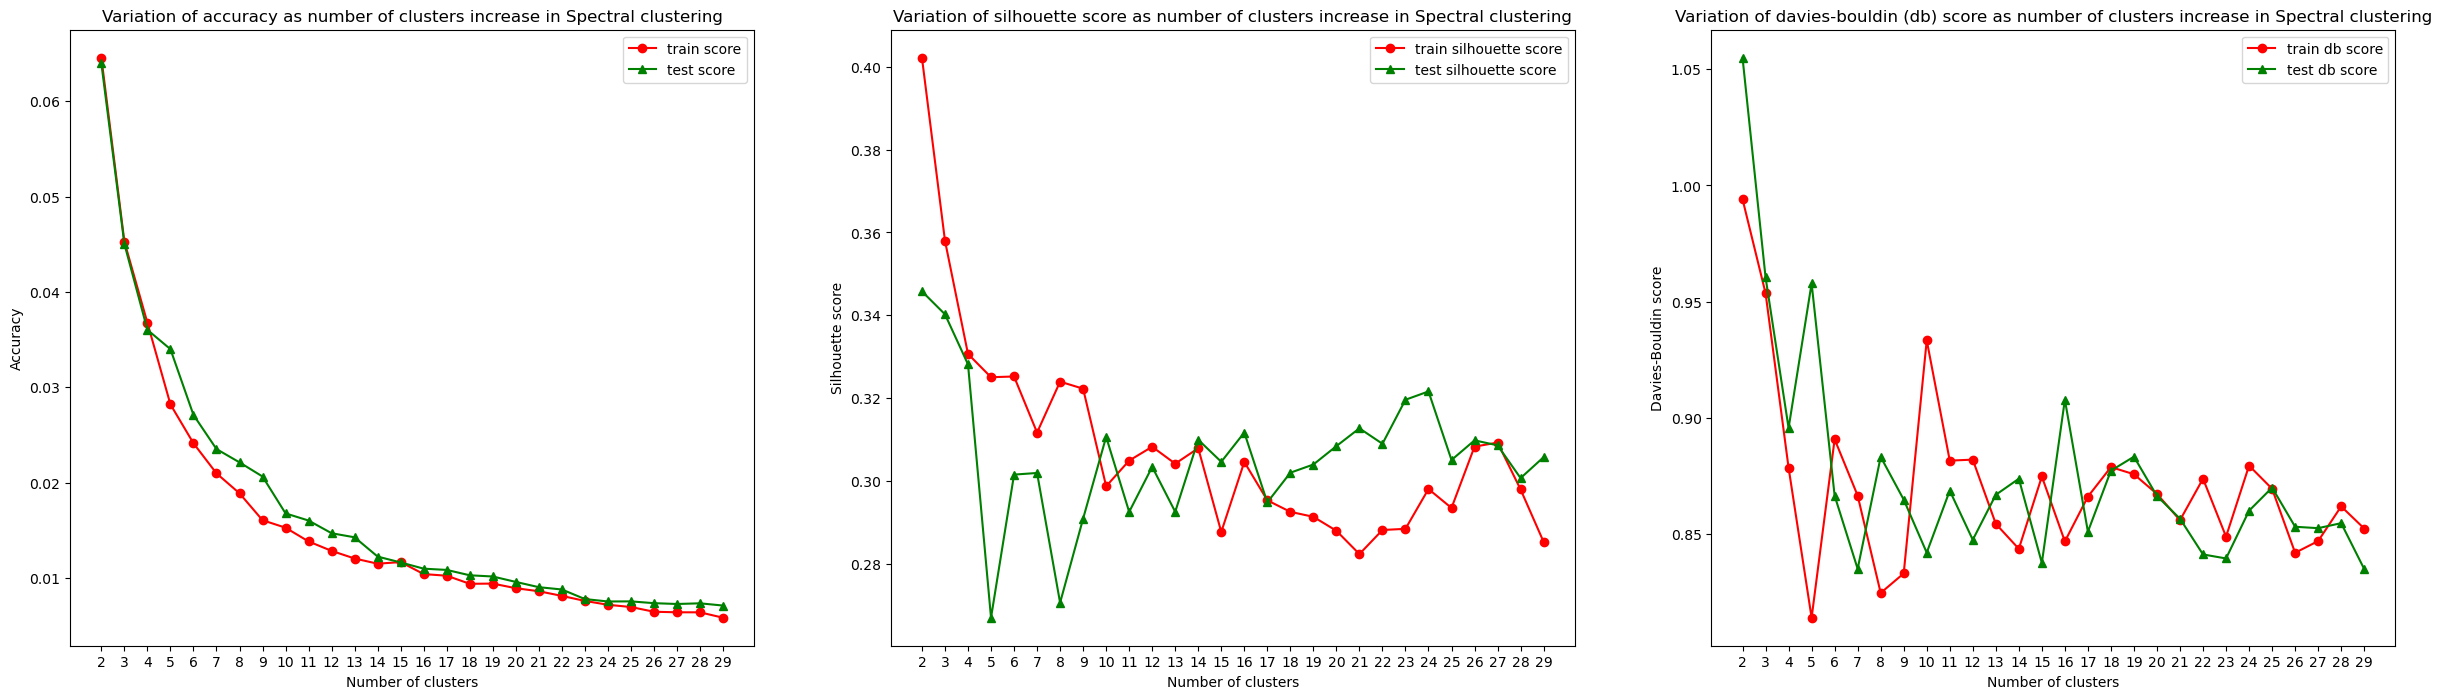

In [22]:
#### TODO: Write your code here
# Plotting score plots using different evaluation metrics
plt.figure(figsize=(30, 8))

plt.subplot(1,3,1)
plt.plot(range(2,30), sc_score_train, marker = 'o', c='red', label='train score')
plt.plot(range(2,30), sc_score_test, marker = '^', c='green', label='test score')
plt.xlabel('Number of clusters')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy as number of clusters increase in Spectral clustering')
plt.legend()
plt.xticks(range(2,30))

plt.subplot(1,3,2)
plt.plot(range(2,30), sil_score_train, marker = 'o', c='red', label='train silhouette score')
plt.plot(range(2,30), sil_score_test, marker = '^', c='green', label='test silhouette score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Variation of silhouette score as number of clusters increase in Spectral clustering')
plt.xticks(range(2,30))
plt.legend()

plt.subplot(1,3,3)
plt.plot(range(2,30), db_score_train, marker = 'o', c='red', label='train db score')
plt.plot(range(2,30), db_score_test, marker = '^', c='green', label='test db score')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Variation of davies-bouldin (db) score as number of clusters increase in Spectral clustering')
plt.xticks(range(2,30))
plt.legend()

plt.show()

Based on these three plots, the optimal value of clusters could be considered as `7` in case of spectral clustering using first two pc of KernelPCA.

## 5. Comparison of Clustering Techniques 
 
> 1. Create fresh instances of the classifiers with the optimal number of clusters. 
>> For example, if you estimated that the optimal number of cluster in case of spectral clustering shall be 10, train a new spectral clustering instance with `n_clusters=10`.
>>
>> Then, predict the labels of the training dataset using this instance.
> 2. Create `four` subplots in a single figure. Each of them shall be a `scatter plot` between the top two principal components of KernelPCA fitted to the training dataset. So, the points in each of the scatter plots will be the same.
>>
>> Now, color the points as per the following:
>> 
>> 1. The labels predicted by the K-Means classifier trained on original dataset (with all the features) with optimal number of clusters.
>> 2. The labels predicted by the K-Means classifier trained on the top two principal components of KernelPCA with optimal number of clusters.
>> 3. The labels predicted by the spectral clustering classifier trained on the top two principal components of KernelPCA with optimal number of clusters.
>> 4. Use the `quality` variable of the original dataset to show the ground truth labels.
>>
>  What can you infer from the generated figure?




In [23]:
#### TODO: Write your code here
kmeans = KMeans(n_clusters=6, random_state=1).fit(X_train)
kmeans_kpca = KMeans(n_clusters=5, random_state=1).fit(X_train_kpca2)

speccul = SpectralClustering(n_clusters=7, affinity='nearest_neighbors', random_state=1)
#spec_score = pred_spectral_score(X_train_kpca2, speccul.fit_predict(X_train_kpca2))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


Text(0.5, 1.0, 'Labels of original dataset -Ground truth')

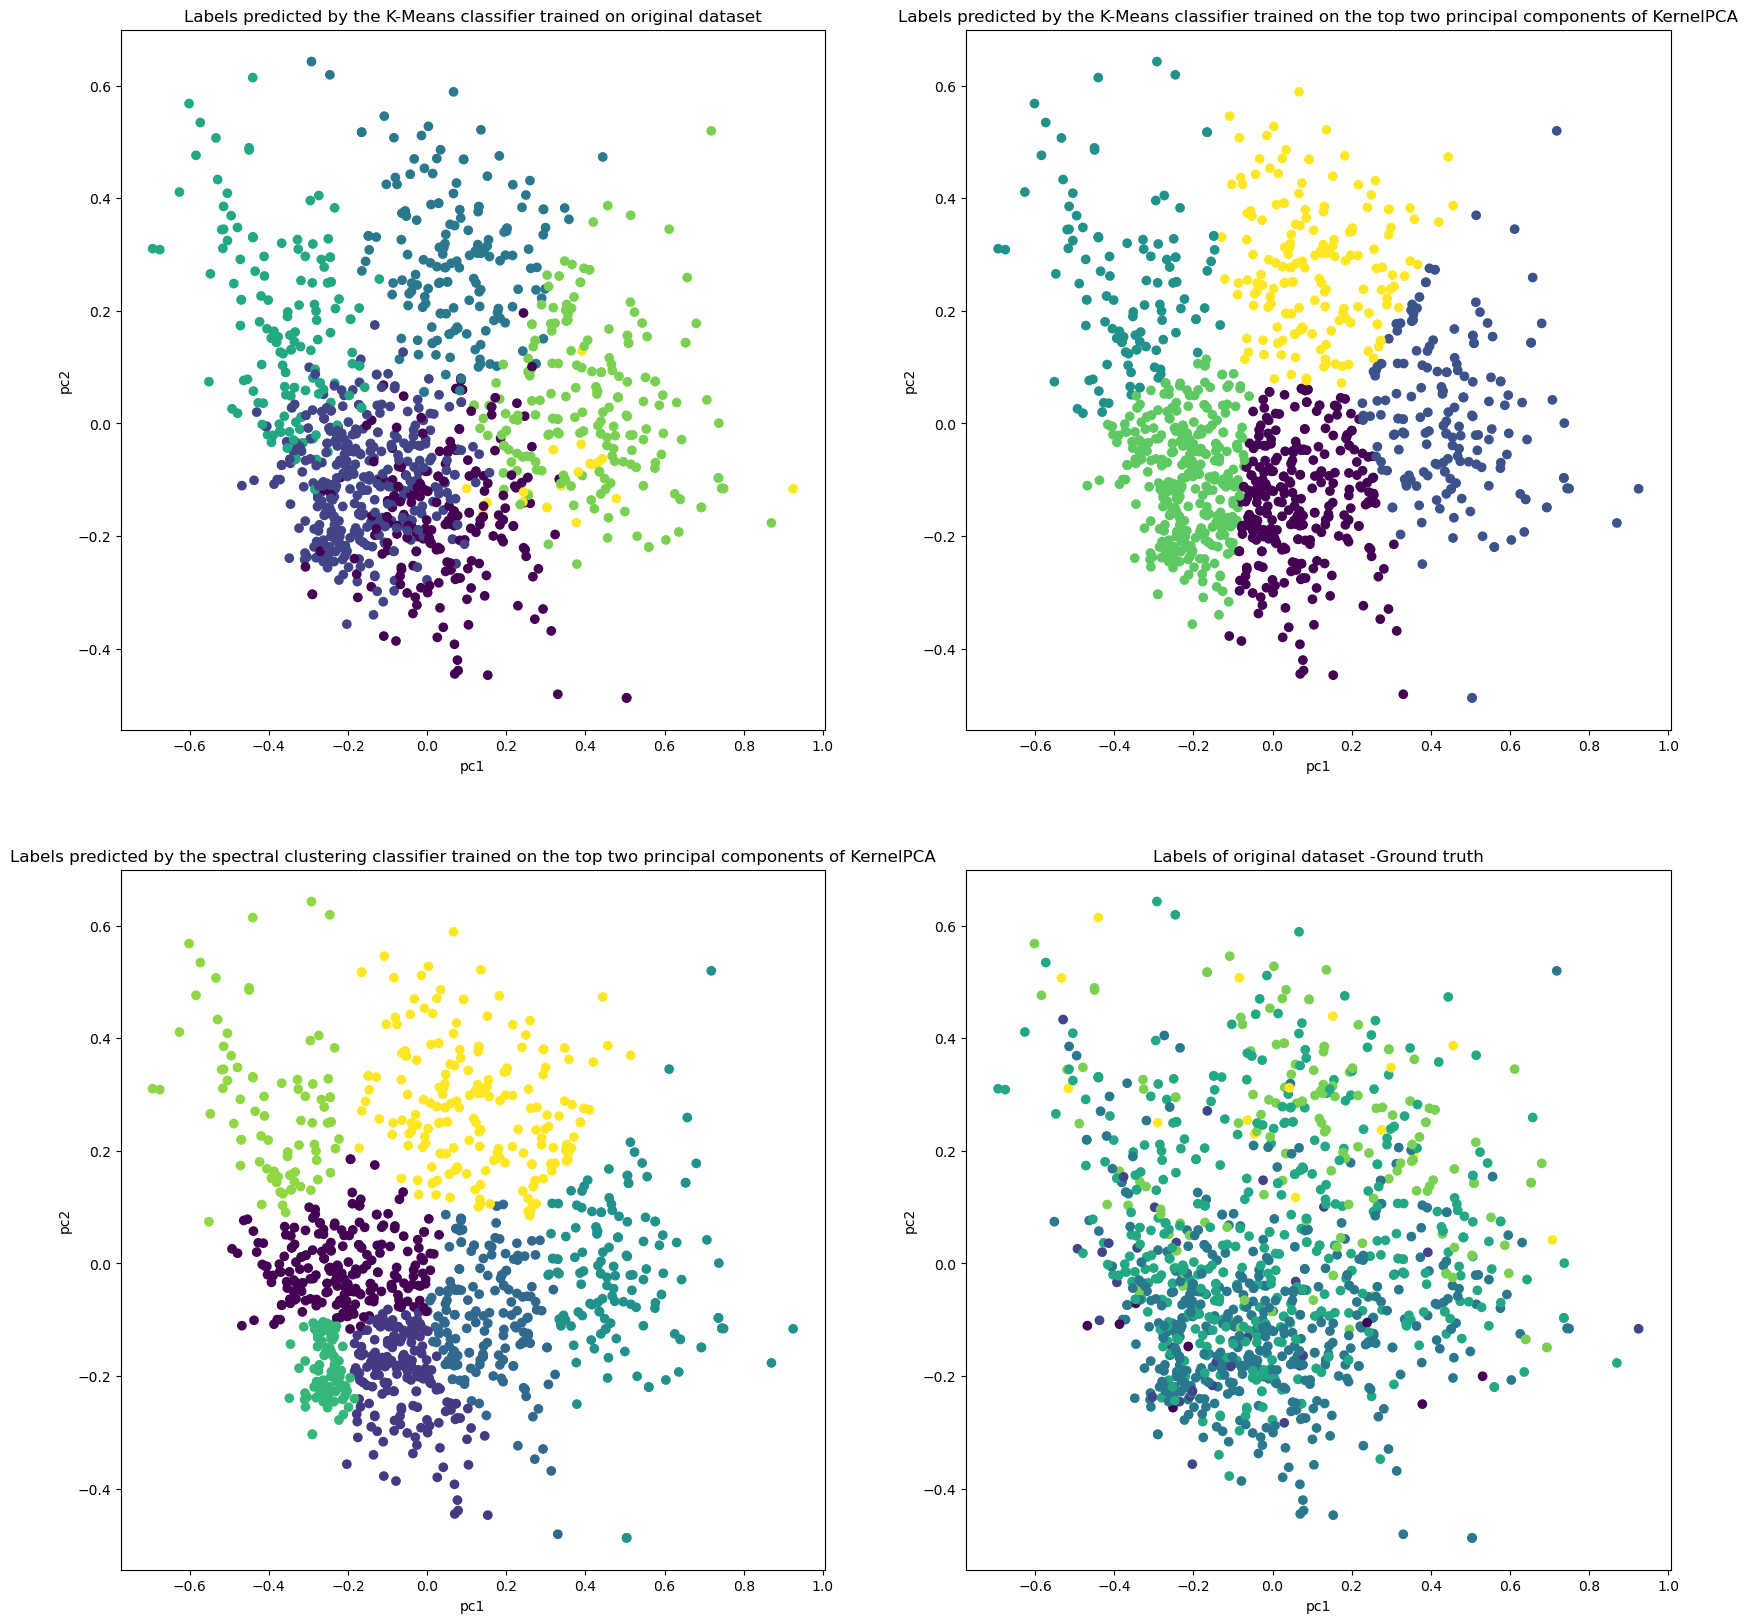

In [24]:
#### TODO: Write your code here
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
plt.scatter(X_train_kpca2[:, 0], X_train_kpca2[:,1], c=np.array(kmeans.labels_))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Labels predicted by the K-Means classifier trained on original dataset')

plt.subplot(2,2,2)
plt.scatter(X_train_kpca2[:, 0], X_train_kpca2[:,1], c=np.array(kmeans_kpca.labels_))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Labels predicted by the K-Means classifier trained on the top two principal components of KernelPCA')

plt.subplot(2,2,3)
plt.scatter(X_train_kpca2[:, 0], X_train_kpca2[:,1], c=np.array(speccul.fit_predict(X_train_kpca2)))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Labels predicted by the spectral clustering classifier trained on the top two principal components of KernelPCA')

plt.subplot(2,2,4)
plt.scatter(X_train_kpca2[:, 0], X_train_kpca2[:,1], c=np.array(y_train))
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title('Labels of original dataset -Ground truth')

1. Using two principal components for fitting models result in better quality clusters. This can be observed by comparing plots 1,2 and 3.